***William Su*** <br>
CMPE256 - S22<br>
Final Project test <br>
Amazon food reviews sentiment analysis <br>

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
nltk.download('stopwords')
nltk.download('punkt')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

[nltk_data] Downloading package stopwords to /Users/adam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Data prep**

In [3]:
#data = pd.read_csv('finefoods.txt', sep='\t', header=None)
# Convert to csv file
# Open piclle file
import pickle
file = "vocab.pickle"
file = "probs.pickle"
file = "ppReviewsMIN.pickle"
file = "ppReviewsFULL.pickle"



# # objects = []
# # with (open(file, "rb")) as openfile:
# #     while True:
# #         try:
# #             objects.append(pickle.load(openfile))
# #             #print(objects)
# #             #print("This is the object: ", objects[0])
# #         except EOFError:
# #             break
# data = []
# with open(file, 'rb') as f:
#     try:
#         data = pickle.load(f)
#     except:
#         print("Error")

data = pd.read_csv('data/Reviews.csv')

# Convert pickle to panda dataframe
#data = pd.read_csv('Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print(data)

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

***Drop unneeded columns***

In [5]:
data = data.loc[:, [col in ['Score', 'Summary', 'Text'] for col in data.columns]]
data.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


***Combine Summary and Text features***

In [6]:
combined = data['Summary'] + ' ' + data['Text']
data = data.drop(['Summary', 'Text'], axis = 1)
data['Text'] = combined
data

,Score,Text
0,5,Good Quality Dog Food I have bought several of...
1,1,Not as Advertised Product arrived labeled as J...
2,4,"""Delight"" says it all This is a confection tha..."
3,2,Cough Medicine If you are looking for the secr...
4,5,Great taffy Great taffy at a great price. The...
...,...,...
568449,5,Will not do without Great for sesame chicken.....
568450,2,disappointed I'm disappointed with the flavor....
568451,5,Perfect for our maltipoo These stars are small...
568452,5,Favorite Training and reward treat These are t...


***Turn Score into Pos/Neg/Neu Sentiment***

In [7]:
def calcSentiment(score):
    if score > 3:
        return 1
    elif score < 3:
        return -1
    else:
        return 0

In [8]:
data['Sentiment'] = data['Score'].apply(lambda x: calcSentiment(x))
data = data.drop(['Score'], axis = 1)
data

,Text,Sentiment
0,Good Quality Dog Food I have bought several of...,1
1,Not as Advertised Product arrived labeled as J...,-1
2,"""Delight"" says it all This is a confection tha...",1
3,Cough Medicine If you are looking for the secr...,-1
4,Great taffy Great taffy at a great price. The...,1
...,...,...
568449,Will not do without Great for sesame chicken.....,1
568450,disappointed I'm disappointed with the flavor....,-1
568451,Perfect for our maltipoo These stars are small...,1
568452,Favorite Training and reward treat These are t...,1


# **NLP word processing**
(These take a while to run, especially stemming)

In [9]:
data['CleanText'] = data['Text'].apply(str) #some reviews are floats for some reason

In [10]:
#make lowercase
data['CleanText'] = data['CleanText'].apply(lambda x: x.lower())

In [11]:
#remove punctuation
data['CleanText'] = data['CleanText'].apply(lambda x: "".join([char for char in x if char not in string.punctuation]))

In [12]:
#tokenization
data['CleanText'] = data['CleanText'].apply(lambda x: nltk.word_tokenize(x))

In [13]:
#stopword removal
stop_words = stopwords.words('english')
data['CleanText'] = data['CleanText'].apply(lambda x: [word for word in x if word not in stop_words])

In [14]:
#stemming
porter = PorterStemmer()
data['CleanText'] = data['CleanText'].apply(lambda x: [porter.stem(word) for word in x])

In [15]:
#turn all reviews into sets, as duplicate words aren't needed
data['CleanText'] = data['CleanText'].apply(set)

In [16]:
#replace and clean up
data = data.drop(['Text'], axis=1)
data['Text'] = data['CleanText']
data = data.drop(['CleanText'], axis=1)
data

,Sentiment,Text
0,1,"{food, bought, good, better, like, process, fo..."
1,-1,"{advertis, sure, unsalt, peanutsth, peanut, ar..."
2,1,"{say, mouth, centuri, yummi, edmund, light, ge..."
3,-1,"{order, believ, soda, root, good, made, ingred..."
4,1,"{taffi, deal, price, yummi, lover, great, deli..."
...,...,...
568449,1,"{atmi, love, without, recip, find, good, husba..."
568450,-1,"{disappoint, buy, ill, especi, still, thank, c..."
568451,1,"{sweet, food, preserv, without, potato, like, ..."
568452,1,"{sweet, dog, lower, love, nose, good, wet, tra..."


***Separate data into positive/negative datasets***

In [18]:
pos = data.loc[data['Sentiment'] == 1]
neg = data.loc[data['Sentiment'] == -1]

In [19]:
pos
neg

,Sentiment,Text
0,1,"{food, bought, good, better, like, process, fo..."
2,1,"{say, mouth, centuri, yummi, edmund, light, ge..."
4,1,"{taffi, deal, price, yummi, lover, great, deli..."
5,1,"{order, root, enjoy, brand, watermelon, pound,..."
6,1,"{stuck, well, brand, good, would, love, saltwa..."
...,...,...
568448,1,"{dont, 1, there, huge, use, larg, good, compla..."
568449,1,"{atmi, love, without, recip, find, good, husba..."
568451,1,"{sweet, food, preserv, without, potato, like, ..."
568452,1,"{sweet, dog, lower, love, nose, good, wet, tra..."


,Sentiment,Text
1,-1,"{advertis, sure, unsalt, peanutsth, peanut, ar..."
3,-1,"{order, believ, soda, root, good, made, ingred..."
12,-1,"{food, cat, two, need, review, fan, bowl, rela..."
16,-1,"{sweet, zip, baggi, good, like, tv, transfer, ..."
26,-1,"{buy, candi, flavor, nasti, red, would, plan, ..."
...,...,...
568433,-1,"{food, suck, well, complain, healthi, would, p..."
568434,-1,"{sweet, pretti, choic, rice, good, like, broth..."
568435,-1,"{good, meal, like, broth, howev, 15, tortellin..."
568446,-1,"{order, br, like, elsewher, two, back, wrong, ..."


# **Naive Bayes**

In [20]:
def get_probs(word, pos, neg): #gets probabilities of each individual word in positive and negative datasets
    pres = sum(pos['Text'].apply(lambda x: word in x))/len(pos)
    nres = sum(neg['Text'].apply(lambda x: word in x))/len(neg)
    return {
        'pos': pres,
        'neg': nres
    }

def get_total_probs(wordset, pos, neg):
    posprob = 1
    negprob = 1
    for word in wordset: #get probabilities of each individual word and multiply all together
        prob = get_probs(word, pos, neg)
        posprob *= prob['pos']
        negprob *= prob['neg']
    return {
        'pos': posprob,
        'neg': negprob,
        'pred': 1 if posprob > negprob else -1
    }

In [21]:
#grab non-neutral data to use as test data
non_neutral = data.loc[abs(data['Sentiment']) == 1]

In [22]:
#sample some data from test set to run tests on
num_samples = 100
test_set = non_neutral.sample(num_samples)

In [23]:
#test naive bayes algorithm on test set
results = []
count = 0
for index, row in test_set.iterrows():
    review = row['Text']
    probs = get_total_probs(review, pos, neg)
    probs['tru'] = row['Sentiment']
    results.append(probs)
    count += 1
    clear_output(wait=True)
    print(f"Prediction {count} of {num_samples} done.")

Prediction 100 of 100 done.


***Evaluate accuracy of results***

In [24]:
correct = 0
for attempt in results:
    if attempt['tru'] == attempt['pred']:
        correct += 1
correct/len(results)

0.89

## LSTM
Adam Goldstein
4/26/2022
CMPE 256

In [42]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
# Import train test split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np




### Convert Data back to list format

In [37]:
print((data['Text']))
# Convert data['Text'] to a series of lists

data['Text'] = data['Text'].apply(lambda x: list(x))


print(data['Text'])

0         {food, bought, good, better, like, process, fo...
1         {advertis, sure, unsalt, peanutsth, peanut, ar...
2         {say, mouth, centuri, yummi, edmund, light, ge...
3         {order, believ, soda, root, good, made, ingred...
4         {taffi, deal, price, yummi, lover, great, deli...
                                ...                        
568449    {atmi, love, without, recip, find, good, husba...
568450    {disappoint, buy, ill, especi, still, thank, c...
568451    {sweet, food, preserv, without, potato, like, ...
568452    {sweet, dog, lower, love, nose, good, wet, tra...
568453    {gener, satisfi, advertis, honey, cereal, use,...
Name: Text, Length: 568454, dtype: object
0         [food, bought, good, better, like, process, fo...
1         [advertis, sure, unsalt, peanutsth, peanut, ar...
2         [say, mouth, centuri, yummi, edmund, light, ge...
3         [order, believ, soda, root, good, made, ingred...
4         [taffi, deal, price, yummi, lover, great, deli..

In [43]:
# Tokenize the data

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['Text'])

## Make train test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.2)


## Tokenize and make sequences with Data

In [46]:
X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)


## Pad the Data

In [47]:

max_review_length = 500
X_train_pad = sequence.pad_sequences(X_train_tok, maxlen=max_review_length)
X_test_pad = sequence.pad_sequences(X_test_tok, maxlen=max_review_length)


## Make the Model

In [48]:
model = Sequential()
model.add(Embedding(5000, 32, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


## Train the Model

In [50]:
history = model.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_split=0.2)
scores = model.evaluate(X_test_pad, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/3
11370/11370 [==============================] - 1580s 139ms/step - loss: -10.2716 - accuracy: 0.6998 - val_loss: -33.3234 - val_accuracy: 0.7609
Epoch 2/3
11370/11370 [==============================] - 1535s 135ms/step - loss: -58.4489 - accuracy: 0.7080 - val_loss: -86.7640 - val_accuracy: 0.7584
Epoch 3/3
11370/11370 [==============================] - 1558s 137ms/step - loss: -120.0564 - accuracy: 0.7092 - val_loss: -152.8033 - val_accuracy: 0.7528
Accuracy: 75.17%


## Plot the results


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

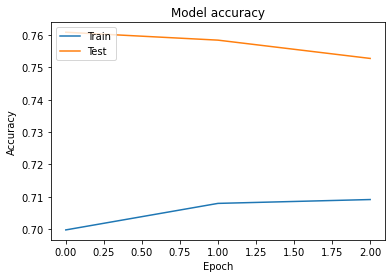

In [54]:
# Plot training & validation accuracy values
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

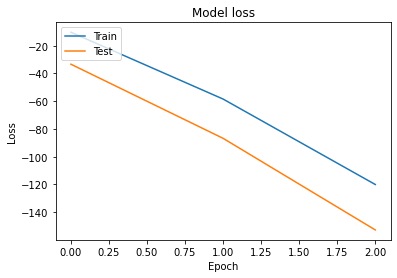

In [55]:
# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')